In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


Info in <TUnixSystem::ACLiC>: creating shared library /home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti_cc.so


In [135]:
date = "JUN21"

chain = ROOT.TChain("events")
chain.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
df_SGN = ROOT.RDataFrame(chain)

In [136]:
df_SGN = df_SGN.Define("scale", "w*lumiIntegrated")\
            .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[3]")\
            .Define("goodMeson_ditrk_eta_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[1]")\
            .Define("goodMeson_ditrk_phi_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[2]")\
            .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 333, 25)[0]")\
            .Define("goodMeson_leadtrk_pt_GEN", "getMaximum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 333, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25))")\
            .Define("goodMeson_subleadtrk_pt_GEN", "getMinimum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 333, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25))")\
            .Define("goodPhotons_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")\
            .Define("goodMeson_DR_GEN", "getDR(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, -211, 333, 25, 211, 333, 25)")\
            .Define("goodMeson_mass_GEN", "get3BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 111, 333, 25)[3]")\
            .Define("goodMeson_pt_GEN", "get3BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -211, 211, 111, 333, 25)[0]")\
            .Define("HCandMass_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 333, 25, 22, 25)[3]")\
            .Define("HCandMassMissing", "compute_HiggsVars_var(goodMeson_ditrk_pt[0],goodMeson_ditrk_eta[0],goodMeson_ditrk_phi[0],goodMeson_ditrk_mass[0],photon_pt,goodPhotons_eta[index_pair[1]],goodPhotons_phi[index_pair[1]],0)")\
            .Define("HCandMassMissing_GEN", "getHiggsPtEtaPhiMPhi3Ditrack(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")\
            .Define("goodMeson_ditrk_pt_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).Pt()")\
            .Define("goodMeson_ditrk_eta_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).Eta()")\
            .Define("goodMeson_ditrk_phi_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).Phi()")\
            .Define("goodMeson_ditrk_mass_sum", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], pi1_mass, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], pi1_mass).M()")\
            .Define("Diff_pt_original", "(goodMeson_ditrk_pt[0]-goodMeson_ditrk_pt_GEN)/goodMeson_ditrk_pt_GEN")\
            .Define("Diff_pt_sum", "(goodMeson_ditrk_pt_sum-goodMeson_ditrk_pt_GEN)/goodMeson_ditrk_pt_GEN")\
            .Define("Diff_eta_original", "(goodMeson_ditrk_eta[0]-goodMeson_ditrk_eta_GEN)/goodMeson_ditrk_eta_GEN")\
            .Define("Diff_eta_sum",     "(goodMeson_ditrk_eta_sum-goodMeson_ditrk_eta_GEN)/goodMeson_ditrk_eta_GEN")\
            .Define("Diff_phi_original", "(goodMeson_ditrk_phi[0]-goodMeson_ditrk_phi_GEN)/goodMeson_ditrk_phi_GEN")\
            .Define("Diff_phi_sum",     "(goodMeson_ditrk_phi_sum-goodMeson_ditrk_phi_GEN)/goodMeson_ditrk_phi_GEN")\
            .Define("Diff_mass_original", "(goodMeson_ditrk_mass[0]-goodMeson_ditrk_mass_GEN)/goodMeson_ditrk_mass_GEN")\
            .Define("Diff_mass_sum",     "(goodMeson_ditrk_mass_sum-goodMeson_ditrk_mass_GEN)/goodMeson_ditrk_mass_GEN")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


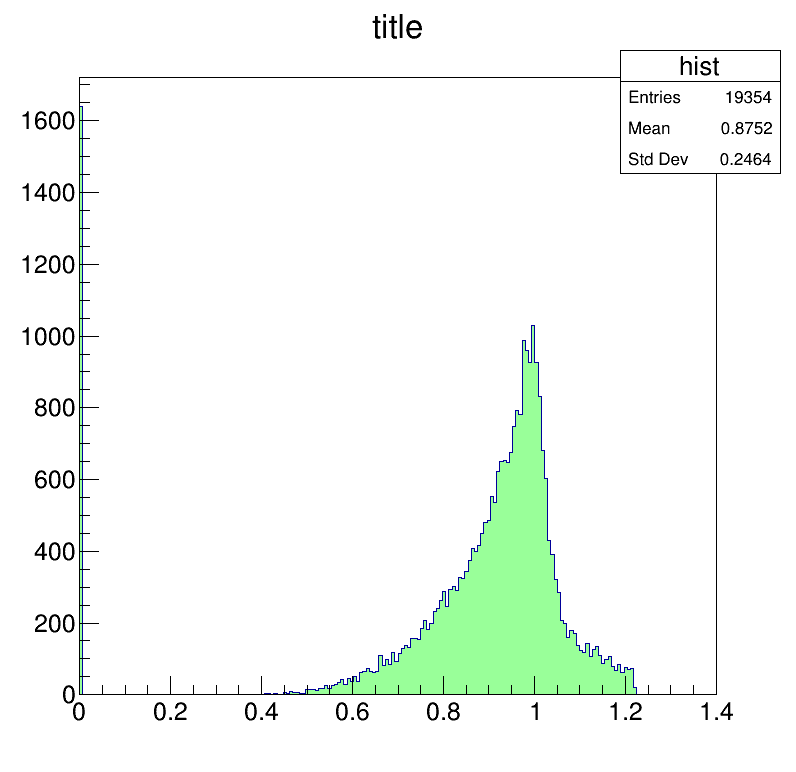

In [137]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

nbins, xlow, xhigh = 200, 0, 1.4

h = df_SGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


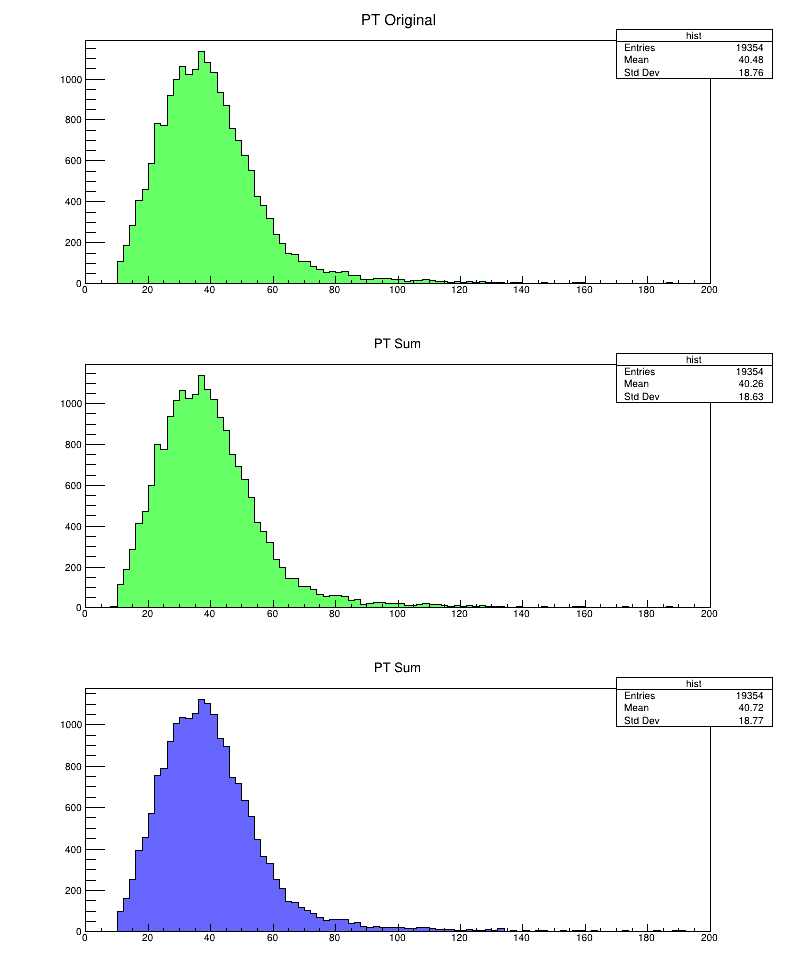

In [138]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 1000)

canvas.Divide(1, 3)

bins, xlow, xhigh = 100, 0.0, 200.0
var = "pt"

h_original = df_SGN.Histo1D(("hist", "PT Original", bins, xlow, xhigh), "goodMeson_ditrk_{}".format(var))

h_sum = df_SGN.Histo1D(("hist", "PT Sum", bins, xlow, xhigh), "goodMeson_ditrk_{}_sum".format(var))

h_gen = df_SGN.Histo1D(("hist", "PT Sum", bins, xlow, xhigh), "goodMeson_ditrk_{}_GEN".format(var))


h_original.SetFillColor(ROOT.kGreen-7)
h_original.SetLineColor(ROOT.kBlack)
h_sum.SetFillColor(ROOT.kGreen-7)
h_sum.SetLineColor(ROOT.kBlack)
h_gen.SetFillColor(ROOT.kBlue-7)
h_gen.SetLineColor(ROOT.kBlack)

canvas.cd(1)
h_original.Draw("hist")
canvas.cd(2)
h_sum.Draw("hist")
canvas.cd(3)
h_gen.Draw("hist")


canvas.Draw()

Original:  0.07643255770348674
Sum:  0.09050729154022975


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2


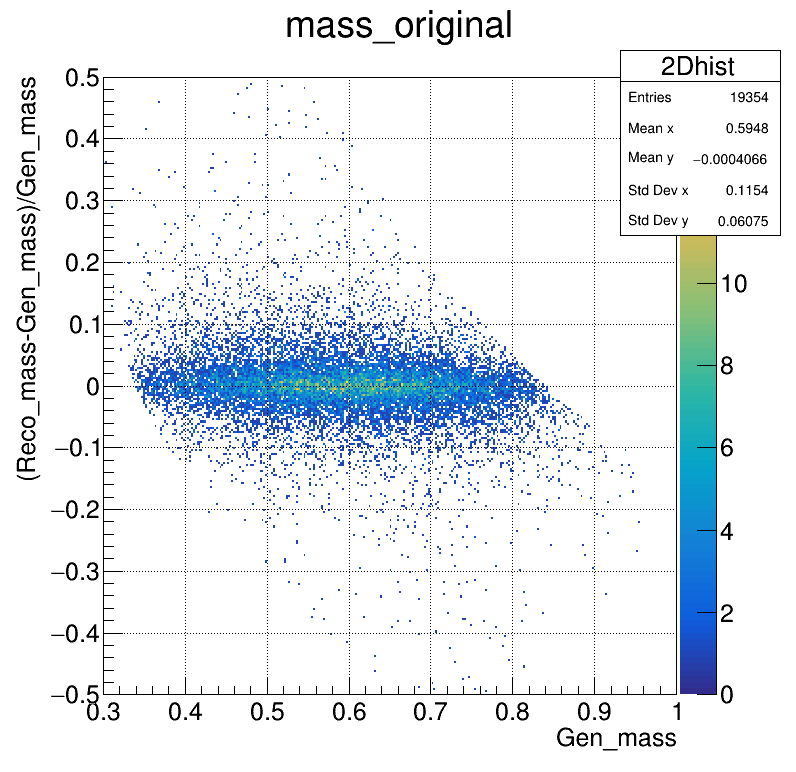

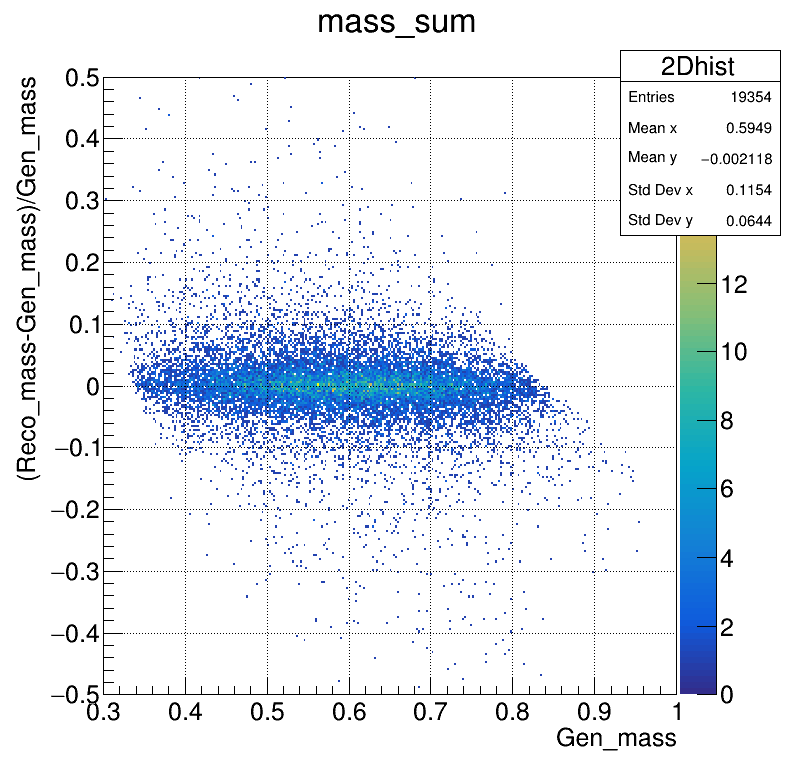

In [150]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

nbins, xlow, xhigh, ylow, yhigh = 300, 0.3, 1.0, -0.5, 0.5

var = "mass"
meth = "original"

h = df_SGN.Histo2D(("2Dhist", var + "_" + meth, nbins, xlow, xhigh, nbins, ylow, yhigh), "goodMeson_ditrk_{}_GEN".format(var), "Diff_{}_{}".format(var, meth))

h.GetXaxis().SetTitle("Gen_{0}".format(var))
h.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h.GetZaxis().SetTitle("Events")
canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)

h.SetContour(100)
h.Draw("colz")
canvas.SetGrid()

canvas.Draw()

canvas2 = ROOT.TCanvas("canvas2", "canvas2", 800, 800)

meth = "sum"

h2 = df_SGN.Histo2D(("2Dhist", var + "_" + meth, nbins, xlow, xhigh, nbins, ylow, yhigh), "goodMeson_ditrk_{}_GEN".format(var), "Diff_{}_{}".format(var, meth))

h2.GetXaxis().SetTitle("Gen_{0}".format(var))
h2.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h2.GetZaxis().SetTitle("Events")
canvas2.SetRightMargin(0.15)
canvas2.SetLeftMargin(0.13)

h2.SetContour(100)
h2.Draw("colz")
canvas2.SetGrid()

canvas2.Draw()


cols = ["Diff_{}_original".format(var), "Diff_{}_sum".format(var)]
x = df_SGN.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)

orig = pddf["Diff_{}_original".format(var)].to_numpy()
summed = pddf["Diff_{}_sum".format(var)].to_numpy()
print("Original: ", np.sqrt(np.sum(orig**2)/len(orig)))
print("Sum: ", np.sqrt(np.sum(summed**2)/len(summed)))

In [159]:
cols = ["goodMeson_pt", "goodMeson_mass", "goodMeson_ditrk_pt", "goodMeson_ditrk_mass", "goodMeson_ditrk_pt_sum", "goodMeson_ditrk_mass_sum", "goodMeson_Nphotons", "goodMeson_photons_pt", "goodMeson_photons_eta", "goodMeson_photons_phi", "goodMeson_ditrk_eta_sum", "goodMeson_ditrk_phi_sum", "goodMeson_eta", "goodMeson_phi"]

x = df_SGN.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

#display(pddf[(pddf["goodMeson_mass"] == 0) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
#display(pddf[(pddf["goodMeson_mass"] == 0)])
pddf["goodMeson_mass"] = pddf["goodMeson_mass"].apply(lambda x: x[0])
pddf["goodMeson_eta"] = pddf["goodMeson_eta"].apply(lambda x: x[0])
pddf["goodMeson_phi"] = pddf["goodMeson_phi"].apply(lambda x: x[0])
pddf["goodMeson_pt"] = pddf["goodMeson_pt"].apply(lambda x: x[0])
pddf["goodMeson_Nphotons"] = pddf["goodMeson_Nphotons"].apply(lambda x: x[0])

pddf["Sum"] = pddf.apply(lambda row: ROOT.sum2Body(row["goodMeson_ditrk_pt_sum"], row["goodMeson_ditrk_eta_sum"], row["goodMeson_ditrk_phi_sum"],\
                                                row["goodMeson_ditrk_mass_sum"], row["goodMeson_photons_pt"][0], row["goodMeson_photons_eta"][0],\
                                                row["goodMeson_photons_phi"][0], 0.0), axis=1)

pddf["SumPT"] = pddf["Sum"].apply(lambda x: x.pt())
pddf["SumEta"] = pddf["Sum"].apply(lambda x: x.Eta())
pddf["SumPhi"] = pddf["Sum"].apply(lambda x: x.Phi())
pddf["SumMass"] = pddf["Sum"].apply(lambda x: x.M())

#pddf['goodMeson_Nphotons'] = pddf['goodMeson_Nphotons'].apply(lambda x: x[0])
display(pddf[(pddf["goodMeson_mass"] > 0) & (abs(pddf["goodMeson_mass"] - pddf["SumMass"]) > 0.04) & (pddf["goodMeson_Nphotons"] == 1)])
#display(pddf[(pddf["goodMeson_mass"] > 0) & (pddf["goodMeson_Nphotons"] > 1)])

,goodMeson_pt,goodMeson_mass,goodMeson_ditrk_pt,goodMeson_ditrk_mass,goodMeson_ditrk_pt_sum,goodMeson_ditrk_mass_sum,goodMeson_Nphotons,goodMeson_photons_pt,goodMeson_photons_eta,goodMeson_photons_phi,goodMeson_ditrk_eta_sum,goodMeson_ditrk_phi_sum,goodMeson_eta,goodMeson_phi,Sum,SumPT,SumEta,SumPhi,SumMass
2771,138.041565,0.999281,[110.4032211303711],[0.8023955821990967],110.401627,0.800391,1,[27.640625],[2.150639295578003],[2.812488555908203],2.151436,2.820393,2.151282,2.818810,"(138.042,2.15128,2.81881,0.951972)",138.041565,2.151282,2.818810,0.951972
5036,319.374817,1.075070,[251.8080596923828],[0.7019795179367065],251.812347,0.707107,1,[67.5625],[-1.9180883169174194],[2.8400280475616455],-1.923625,2.841364,-1.922456,2.841082,"(319.375,-1.92246,2.84108,0.935414)",319.374817,-1.922456,2.841082,0.935414
7546,157.359329,0.842564,[141.899169921875],[0.5046498775482178],141.906204,0.500000,1,[15.453125],[2.095889091491699],[2.147136688232422],2.081907,2.147171,2.083288,2.147168,"(157.359,2.08329,2.14717,0.901388)",157.359329,2.083289,2.147168,0.901388
7975,411.593231,1.214324,[351.8824768066406],[0.7009318470954895],351.874542,0.935414,1,[59.71875],[1.9466536045074463],[2.4819116592407227],1.952993,2.480400,1.952076,2.480619,"(411.593,1.95208,2.48062,1.45774)",411.593231,1.952076,2.480619,1.457738
16032,103.264893,0.542755,[86.3422622680664],[0.44703689217567444],86.343124,0.433013,1,[16.921875],[2.1348917484283447],[1.4781694412231445],2.129899,1.474270,2.130720,1.474909,"(103.265,2.13072,1.47491,0.5)",103.264893,2.130720,1.474909,0.500000
16282,320.999115,0.830717,[264.1244812011719],[0.696058452129364],264.124268,0.500000,1,[56.875],[2.1727957725524902],[0.68849778175354],2.171603,0.686156,2.171815,0.686571,"(320.999,2.17181,0.686571,0.612372)",320.999146,2.171815,0.686571,0.612372
16702,165.765060,0.856139,[68.32779693603516],[0.355804979801178],68.327827,0.364434,1,[97.4375],[-2.1129183769226074],[2.0371716022491455],-2.105675,2.033491,-2.109940,2.035655,"(165.765,-2.10994,2.03565,0.810093)",165.765060,-2.109940,2.035655,0.810093


In [6]:
#dfnew = df_D0Star.Filter("goodMeson_ditrk_pt_GEN  < 35").Filter("goodMeson_ditrk_pt_GEN  > 5")

cols = ["goodMeson_pt", "goodMeson_eta", "goodMeson_phi", "goodMeson_mass", "goodMeson_ditrk_pt", "goodMeson_ditrk_eta", "goodMeson_ditrk_phi", "goodMeson_ditrk_mass", "goodMeson_Nphotons", "goodMeson_photons_pt", "goodMeson_photons_eta", "goodMeson_photons_phi"]

x = df_SGN.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

#display(pddf[(pddf["goodMeson_mass"] == 0) & (pddf["goodMeson_ditrk_pt_GEN2"]>0)])
#display(pddf[(pddf["goodMeson_ditrk_pt_GEN2"] != pddf["goodMeson_ditrk_pt_GEN"])])
#display(pddf[(pddf["goodMeson_mass"] == 0)])
for e in cols[:4]:
    pddf[e] = pddf[e].apply(lambda x: x[0])


#pddf['goodMeson_Nphotons'] = pddf['goodMeson_Nphotons'].apply(lambda x: x[0])
display(pddf[(pddf["goodMeson_mass"] == 0)])

,goodMeson_pt,goodMeson_eta,goodMeson_phi,goodMeson_mass,goodMeson_ditrk_pt,goodMeson_ditrk_eta,goodMeson_ditrk_phi,goodMeson_ditrk_mass,goodMeson_Nphotons,goodMeson_photons_pt,goodMeson_photons_eta,goodMeson_photons_phi
26,0.0,-99.0,-99.0,0.0,[21.987329483032227],[-0.39841634035110474],[1.0142107009887695],[0.5073749423027039],[2],[-1.0],[0.0],[0.0]
38,0.0,-99.0,-99.0,0.0,[57.390281677246094],[1.1597099304199219],[-2.2030115127563477],[0.6192908883094788],[1],[-1.0],[0.0],[0.0]
44,0.0,-99.0,-99.0,0.0,[47.78782653808594],[0.46112990379333496],[-2.803821086883545],[0.7293917536735535],[1],[-1.0],[0.0],[0.0]
45,0.0,-99.0,-99.0,0.0,[37.85580825805664],[0.37802281975746155],[2.429685115814209],[0.6456540822982788],[2],[-1.0],[0.0],[0.0]
54,0.0,-99.0,-99.0,0.0,[25.81138801574707],[0.14224062860012054],[-1.5779222249984741],[0.5351846218109131],[1],[-1.0],[0.0],[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...
19286,0.0,-99.0,-99.0,0.0,[38.7965202331543],[0.035781968384981155],[-0.6287145614624023],[0.5726671814918518],[1],[-1.0],[0.0],[0.0]
19294,0.0,-99.0,-99.0,0.0,[24.59137535095215],[0.8607140779495239],[2.448868751525879],[0.45668575167655945],[2],[-1.0],[0.0],[0.0]
19309,0.0,-99.0,-99.0,0.0,[36.537315368652344],[1.2637865543365479],[-2.7849369049072266],[0.5585904717445374],[2],[-1.0],[0.0],[0.0]
19331,0.0,-99.0,-99.0,0.0,[77.9026107788086],[1.4840219020843506],[1.1143079996109009],[0.6726130247116089],[1],[-1.0],[0.0],[0.0]


In [30]:
rownum = 44328
part_id = pddf.iloc[rownum]["GenPart_pdgId"]
mother_idx = pddf.iloc[rownum]["GenPart_genPartIdxMother"]
part_pt = pddf.iloc[rownum]["GenPart_pt"]
part_mass = pddf.iloc[rownum]["GenPart_mass"]
print(pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN"], pddf.iloc[rownum]["goodMeson_ditrk_pt_GEN2"])

width = 8
#print(len(part_id), len(mother_idx), len(part_pt), len(part_mass))
print("Index".ljust(width), "ID".ljust(width), "Mum idx".ljust(width), "PT".ljust(width), "Mass".ljust(width))
print("---------------------------------------------------------------------------")
for e in range(len(part_id)):
    print(str(e).ljust(width), str(part_id[e]).ljust(width), str(mother_idx[e]).ljust(width), str(round(part_pt[e], 3)).ljust(width), str(round(part_mass[e], 4)).ljust(width))

13.427914 13.427914
Index    ID       Mum idx  PT       Mass    
---------------------------------------------------------------------------
0        2212     -1       0.0      0.9375  
1        2212     -1       0.0      0.9375  
2        21       0        0.0      0.0     
3        21       1        0.0      0.0     
4        25       2        114.5    125.0   
5        21       2        114.5    0.0     
6        25       4        145.5    125.0   
7        21       5        109.0    0.0     
8        5        7        74.25    0.0     
9        -5       7        36.875   0.0     
10       -4       1        18.25    0.0     
11       4        1        21.0     0.0     
12       25       6        146.0    125.0   
13       5        8        73.5     0.0     
14       -4       10       18.25    0.0     
15       -5       9        36.5     0.0     
16       4        11       20.938   0.0     
17       25       12       147.0    125.0   
18       5        13       73.5     0.0     
19  